<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/regressao_linear_2023/notebooks/weather_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


# Leitura dos dados

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data-science/reg-linear/Dados/Consumo_cerveja.csv", sep=';')

In [ ]:
df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [ ]:
df.shape

(365, 7)

In [ ]:
df.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


# Análises gráficas

## Plot com subplots (plt)


Text(0.5, 0, 'Dias')

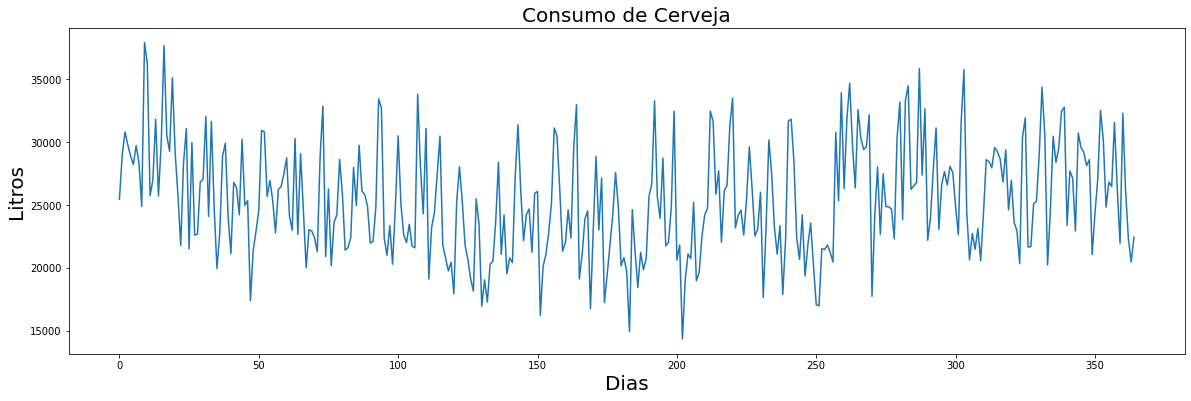

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

ax = df['consumo'].plot()
ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 20)
ax.set_xlabel('Dias', fontsize = 20)

## Boxplot com uma variável

Text(0, 0.5, 'Litros')

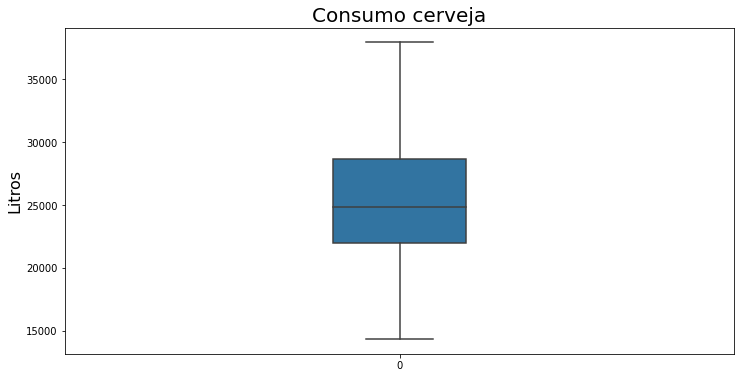

In [ ]:
ax = sns.boxplot(data=df['consumo'], width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title("Consumo cerveja", fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)

## Boxplot com duas variáveis

Text(0.5, 0, 'Final de semana')

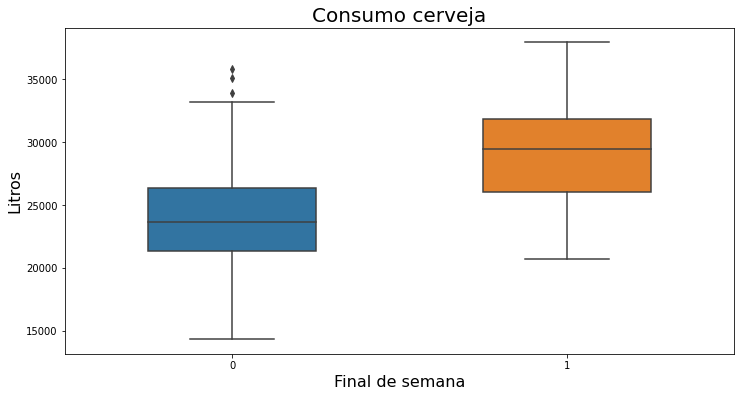

In [ ]:
ax = sns.boxplot(y ='consumo',x = 'fds', data=df, width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Consumo cerveja", fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Final de semana', fontsize = 16)

In [ ]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

Text(0.5, 0, 'Final de semana')

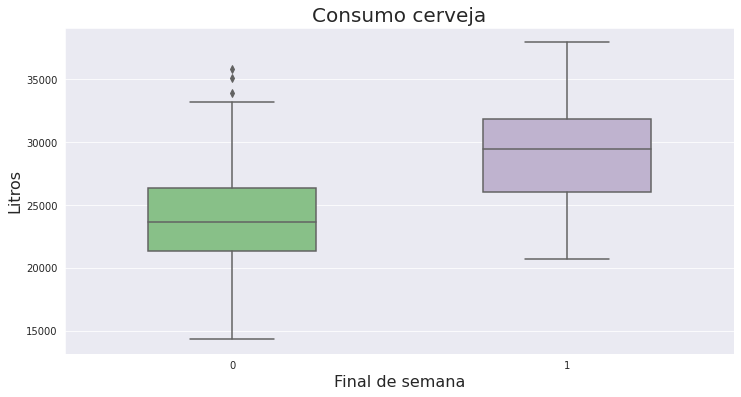

In [ ]:
ax = sns.boxplot(y ='consumo',x = 'fds', data=df, width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Consumo cerveja", fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Final de semana', fontsize = 16)

## Distplot

Text(0, 0.5, 'Consumo de cervejas (litros)')

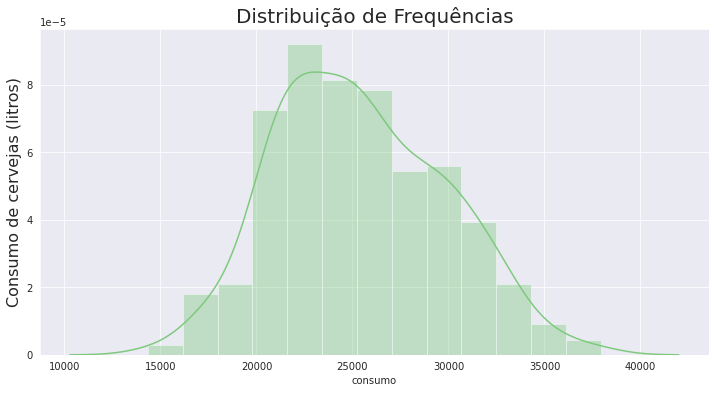

In [ ]:
ax = sns.distplot(df['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências", fontsize = 20)
ax.set_ylabel('Consumo de cervejas (litros)', fontsize = 16)

## Pairplot (sns)

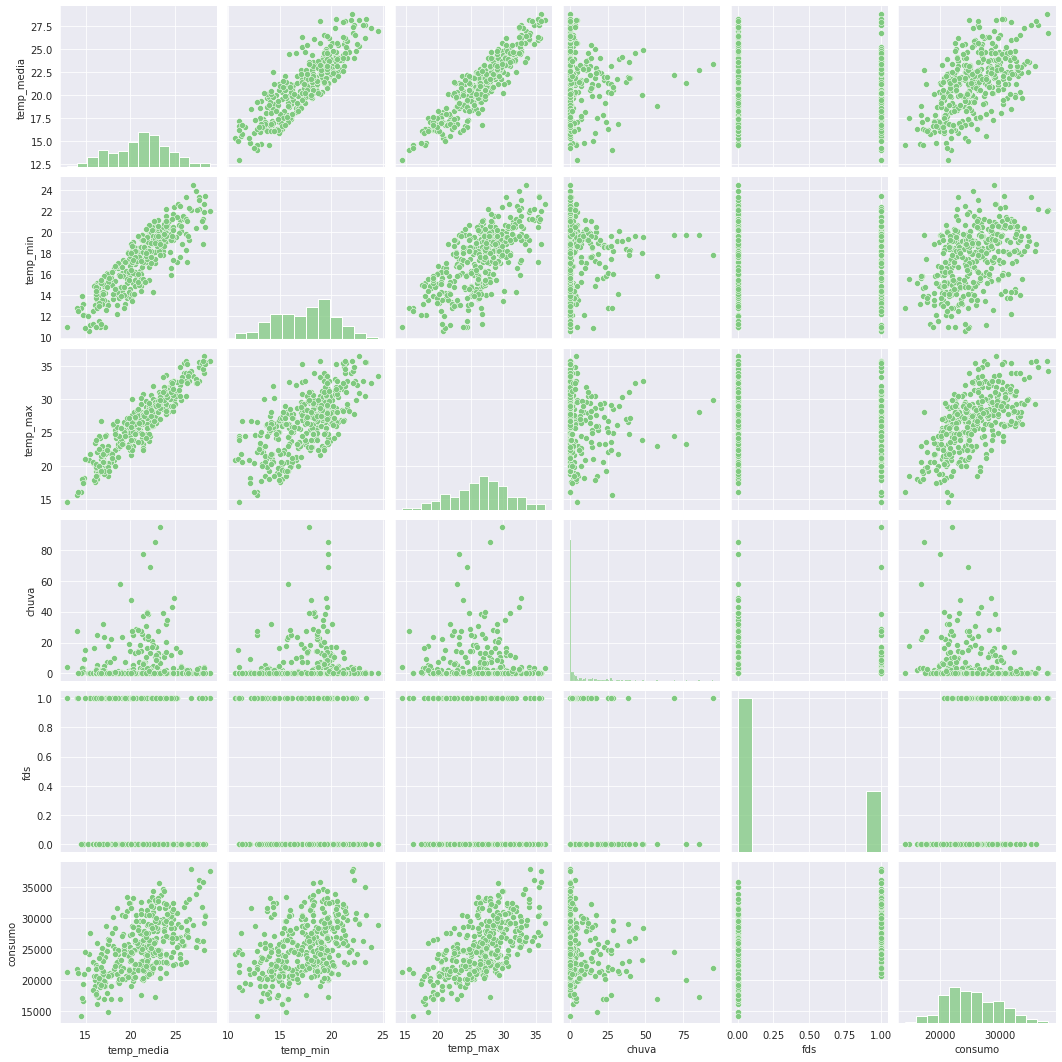

In [ ]:
ax = sns.pairplot(df)

Text(0.5, 1.2, 'Dispersão entre as variáveis')

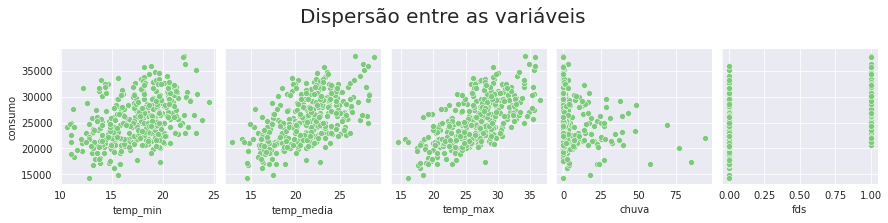

In [ ]:
ax = sns.pairplot(df, y_vars='consumo', x_vars= ['temp_min','temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão entre as variáveis',fontsize = 20, y=1.2)

Text(0.5, 1.2, 'Dispersão entre as variáveis')

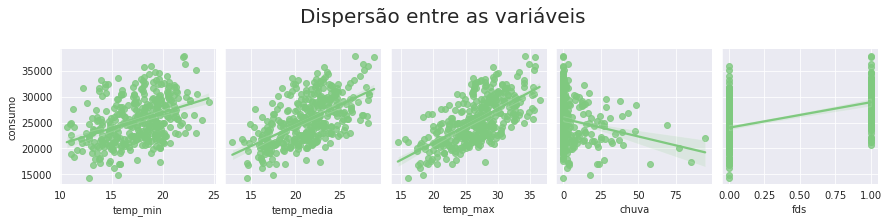

In [ ]:
ax = sns.pairplot(df, y_vars='consumo', x_vars= ['temp_min','temp_media','temp_max','chuva','fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis',fontsize = 20, y=1.2)

## Jointplot

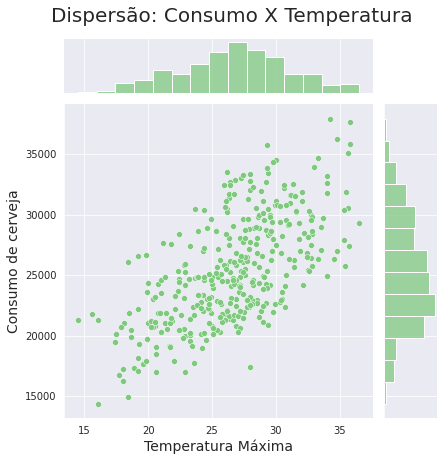

In [ ]:
ax = sns.jointplot(x ='temp_max', y='consumo', data=df)
ax.fig.suptitle("Dispersão: Consumo X Temperatura", fontsize = 20, y = 1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de cerveja", fontsize = 14)

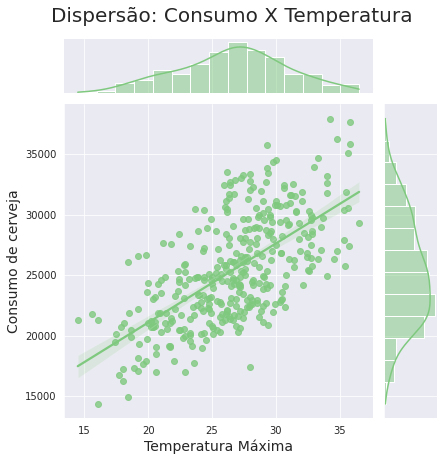

In [ ]:
ax = sns.jointplot(x  ='temp_max', y='consumo', data=df, kind='reg')
ax.fig.suptitle("Dispersão: Consumo X Temperatura", fontsize = 20, y = 1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de cerveja", fontsize = 14)

## LMPlot

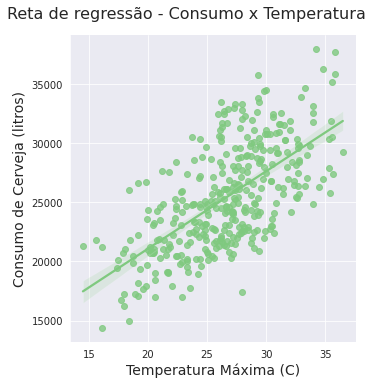

In [ ]:
ax = sns.lmplot(x='temp_max', y='consumo', data=df)
ax.fig.suptitle("Reta de regressão - Consumo x Temperatura", fontsize = 16, y = 1.05)
ax.set_xlabels("Temperatura Máxima (C)", "Consumo de cerveja", fontsize = 14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize = 14)

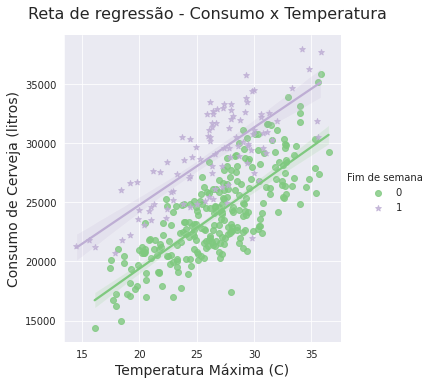

In [ ]:
ax = sns.lmplot(x='temp_max', y='consumo', data=df, hue='fds', markers=['o','*'], legend=False)
ax.fig.suptitle("Reta de regressão - Consumo x Temperatura", fontsize = 16, y = 1.05)
ax.set_xlabels("Temperatura Máxima (C)", "Consumo de cerveja", fontsize = 14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize = 14)
ax.add_legend(title="Fim de semana")

# Modelo de regressão linear

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df[['temp_max','chuva','fds']], df['consumo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2811)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R^2 = {}'.format(modelo.score(X_train, y_train).round(2)))

R^2 = 0.73


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R^2 = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R^2 = 0.69


## Previsões pontuais

In [ ]:
entrada = X_test[0:1]

In [ ]:
modelo.predict(entrada)[0]

26094.901775262017

In [ ]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros' .format(modelo.predict(entrada)[0]))

38742.53 litros


In [ ]:
modelo.intercept_

5951.976339312445

In [ ]:
type(modelo.intercept_)

numpy.float64

In [ ]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [ ]:
type(modelo.coef_)

numpy.ndarray

In [ ]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [ ]:
index=['Intercepto', 'Temperatura máxima', 'Chuva(mm)','Final de Semana']

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index = index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura máxima,684.736759
Chuva(mm),-60.782435
Final de Semana,5401.083339


# Análises gráficas das previsões do modelo

In [ ]:
y_previsto_train = modelo.predict(X_train)

Text(0, 0.5, 'Consumo de cerveja (litros) - Real')

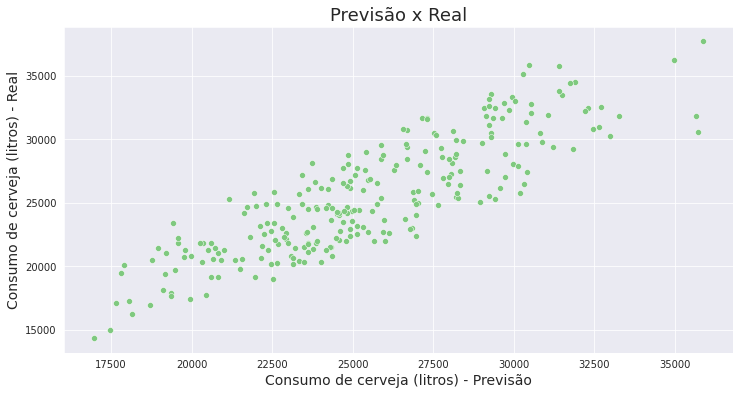

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão x Real", fontsize = 18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Consumo de cerveja (litros) - Real', fontsize = 14)

In [ ]:
residuo = y_train - y_previsto_train

In [ ]:
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

Text(0, 0.5, 'Resíduos')

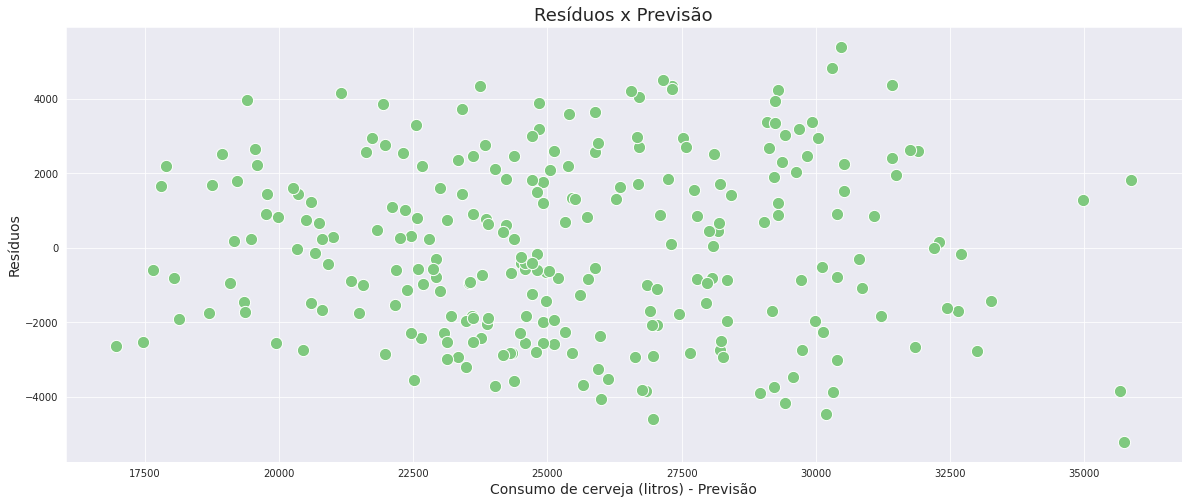

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y=residuo, s = 150)
ax.figure.set_size_inches(20,8)
ax.set_title("Resíduos x Previsão", fontsize = 18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14)

Text(0, 0.5, 'Resíduos^2')

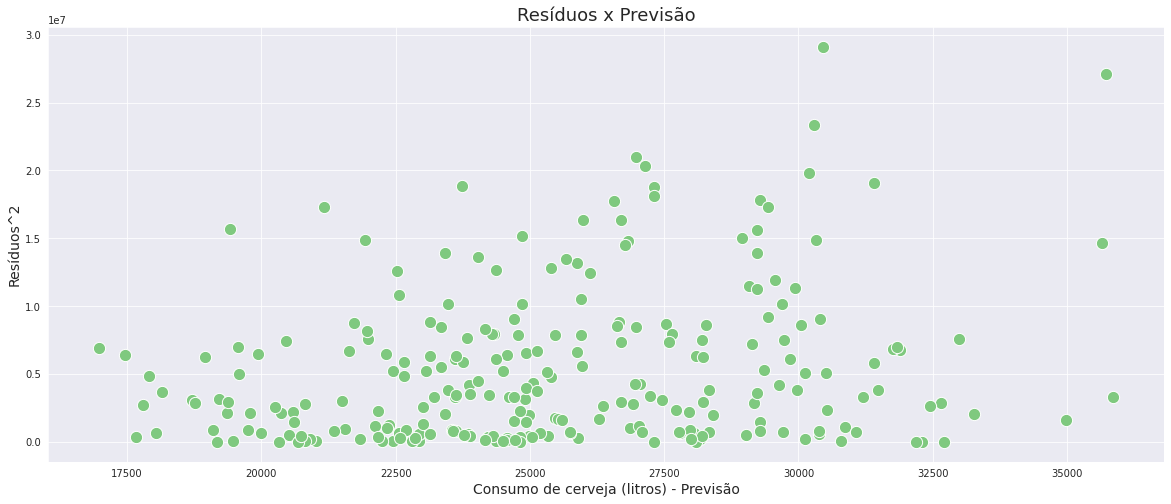

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y=residuo**2, s = 150)
ax.figure.set_size_inches(20,8)
ax.set_title("Resíduos x Previsão", fontsize = 18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Resíduos^2', fontsize = 14)

Text(0, 0.5, 'Litros')

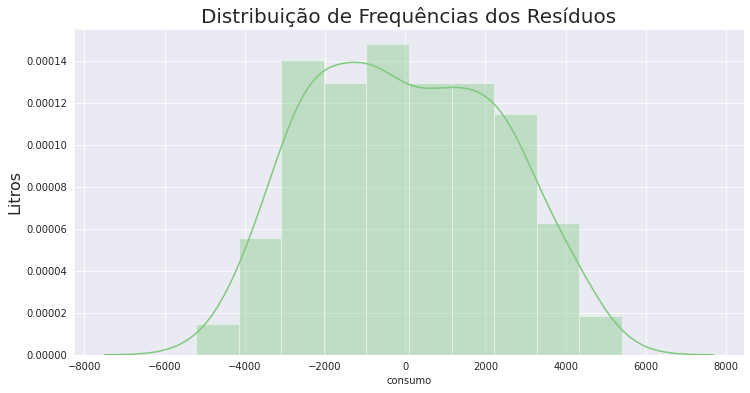

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências dos Resíduos", fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)

# Comparando modelos

In [ ]:
X2 = df[['temp_media','chuva','fds']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.3, random_state = 2811)

In [ ]:
modelo_2 = LinearRegression()

In [ ]:
modelo_2.fit(X2_train, y2_train )

LinearRegression()

In [ ]:
print('Modelo com Temperatura Média')
print('R^2 = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temperatura Máxima
R^2 = 0.66


In [ ]:
print('Modelo com Temperatura Máxima')
print('R^2 = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temperatura Máxima
R^2 = 0.73


In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [ ]:
print('Modelo com Temperatura Média')
print('R^2 = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temperatura Média
R^2 = 0.66


In [ ]:
print('Modelo com Temperatura Máxima')
print('R^2 = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temperatura Máxima
R^2 = 0.69


# Outras métricas de regressão

In [ ]:
EQM_2 = metrics.mean_squared_error(y2_test,y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R2,0.66


In [ ]:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R2,0.69
